# Scalar and Vector Fields

## Scalar Fields

In physics, a scalar field associates a scalar value to every point in a space. The scalar may either be a mathematical number or a physical quantity. For example, the temperature at each point in a room is a scalar field: the temperature at each point can be represented by a single number. For example, the function $T(x,y,z)$ might represent the temperature in a room if $x$, $y$, and $z$ are the Cartesian coordinates of a point in the room. The scalar field value $T$ would be a single number at each point in space.  We could have something like:

$$ T(x,y,z) = 20 + 0.5e^{-x^2} + 0.5e^{-y^2} - 0.1z$$

Scalar fields are required to be coordinate-independent, meaning that any two observers using the same units will agree on the value of the scalar field at the same absolute point in space (or spacetime).
 
Other xamples used in physics include the pressure distribution in a fluid, and spin-zero quantum fields, such as the Higgs field. These fields are the subject of scalar field theory.



## Visualizing Scalar Fields

A scalar field can be visualized as a contour plot or as a density plot. A contour plot uses lines to represent constant values of the scalar field. A density plot uses colors to represent the scalar field. The following code shows how to create a contour plot and a density plot of the scalar field $T(x,y,z)$.

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a scalar field
def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*exp(-y**2) - 0.1*z

# Create a grid of points in the x-y plane
x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the scalar field at the grid points
Z = T(X,Y,0)

# Create a contour plot
plt.contour(X,Y,Z)
plt.show()

# Create a density plot

plt.imshow(Z)
plt.show()
```

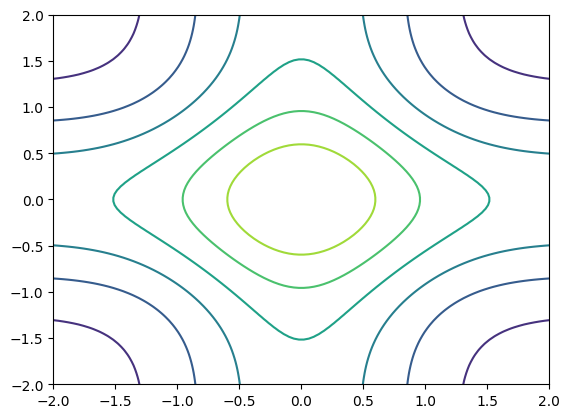

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a scalar field
def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*np.exp(-y**2) - 0.1*z

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the scalar field at the grid points
TZ0 = T(X,Y,0)

# Create a contour plot
plt.contour(X,Y,TZ0)
plt.show()

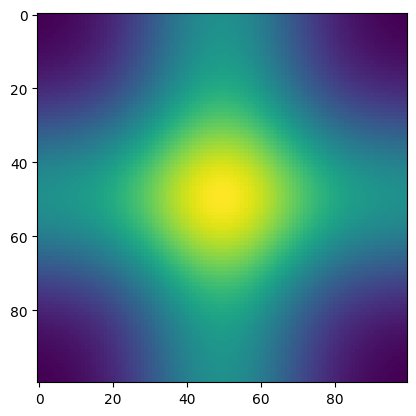

In [4]:
# Create a density plot

plt.imshow(TZ0)
plt.show()

## Vector Fields

In vector calculus, a vector field is an assignment of a vector to each point in a subset of space. 

A vector field in the plane, can be visualized as: a collection of arrows with a given magnitude and direction, each attached to a point in the plane. 

Vector fields are often used to model, for example, the speed and direction of a moving fluid throughout space, or the strength and direction of some force, such as the magnetic or gravitational force, as it changes from one point to another point.

The elements of differential and integral calculus extend naturally to vector fields. When a vector field represents force, the line integral of a vector field represents the work done by a force moving along a path, and under this interpretation conservation of energy is exhibited as a special case of the fundamental theorem of calculus. 

Vector fields can usefully be thought of as representing the velocity of a moving flow in space, and this physical intuition leads to notions such as the divergence (which represents the rate of change of volume of a flow) and curl (which represents the rotation of a flow).

## Visualizing Vector Fields

A vector field can be visualized as a quiver plot. A quiver plot displays velocity vectors as arrows with components (u,v) at the points (x,y). The following code shows how to create a quiver plot of the vector field $V(x,y) = (x,y)$.

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a vector field
def V(x,y):
    return (x,y)

# Create a grid of points in the x-y plane
x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the vector field at the grid points
U,V = V(X,Y)

# Create a quiver plot
plt.quiver(X,Y,U,V)
plt.show()
```

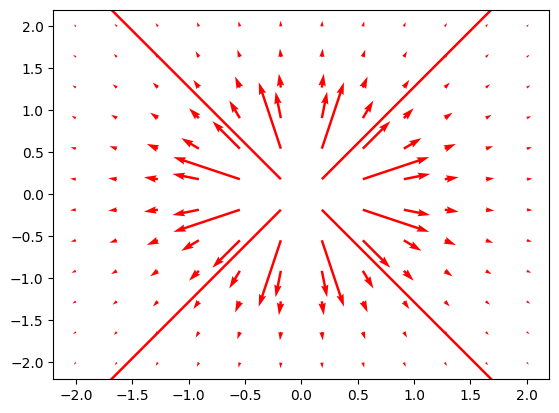

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a vector field
def V(x,y):
    k = 8.99E9
    q = 1E-6
    r = np.sqrt(x**2 + y**2)
    return (k*q*x/r**3, k*q*y/r**3)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,12)
y = np.linspace(-2,2,12)
    
# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the vector field at the grid points
U,V = V(X,Y)

# Create a quiver plot
plt.quiver(X,Y,U,V, color='r')
plt.show()

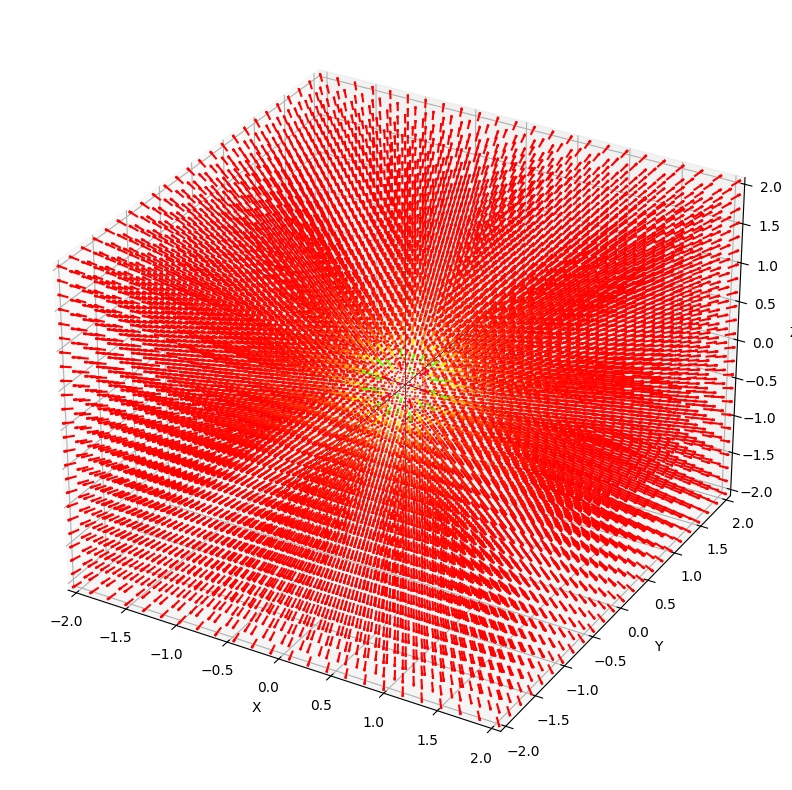

In [38]:
# Create a 3D vector field

def V(x,y,z):
    k = 8.99E9
    q = 1E-6
    r = np.sqrt(x**2 + y**2 + z**2)
    return (k*q*x/r**3, k*q*y/r**3, k*q*z/r**3)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,24)
y = np.linspace(-2,2,24)
z = np.linspace(-2,2,24)

# Create a meshgrid
X,Y,Z = np.meshgrid(x,y,z)

# Evaluate the vector field at the grid points
U,V,W = V(X,Y,Z)

# Create a quiver plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Color by length of vector
c = np.sqrt(U**2 + V**2 + W**2)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)
    
ax.quiver(X, Y, Z, U, V, W, colors=c, length=0.1, normalize=True)
    
# Draw axes
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Draw lines at z=0, x=0, y=0
ax.plot([-2,2],[0,0],[0,0],color='k',lw=0.5)
ax.plot([0,0],[-2,2],[0,0],color='k',lw=0.5)
ax.plot([0,0],[0,0],[-2,2],color='k',lw=0.5)

plt.show()


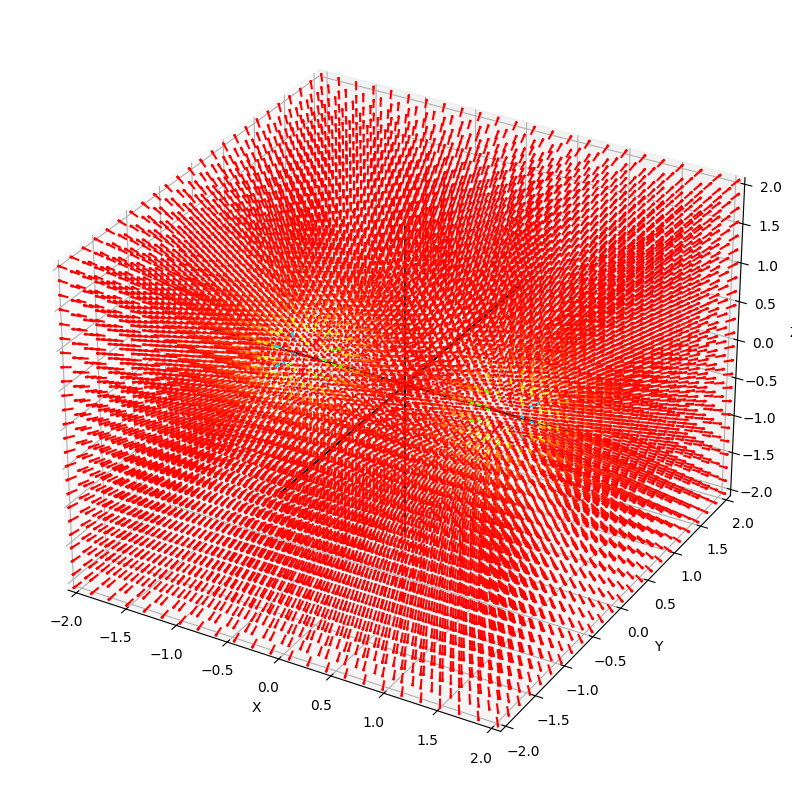

In [37]:
# Create a 3D vector field for an electric dipole

def V(x,y,z):
    k = 8.99E9
    q = 1E-6
    r1 = np.sqrt((x-1)**2 + y**2 + z**2)
    r2 = np.sqrt((x+1)**2 + y**2 + z**2)
    return (k*q*(x-1)/r1**3 + k*q*(x+1)/r2**3, k*q*y/r1**3 + k*q*y/r2**3, k*q*z/r1**3 + k*q*z/r2**3)

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,24)
y = np.linspace(-2,2,24)
z = np.linspace(-2,2,24)

# Create a meshgrid
X,Y,Z = np.meshgrid(x,y,z)

# Evaluate the vector field at the grid points
U,V,W = V(X,Y,Z)

# Create a quiver plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Color by length of vector
c = np.sqrt(U**2 + V**2 + W**2)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

ax.quiver(X, Y, Z, U, V, W, colors=c, length=0.1, normalize=True)

# Draw axes
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Draw lines at z=0, x=0, y=0
ax.plot([-2,2],[0,0],[0,0],color='k',lw=1.5)
ax.plot([0,0],[-2,2],[0,0],color='k',lw=1.5)
ax.plot([0,0],[0,0],[-2,2],color='k',lw=1.5)

plt.show()